In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/average-daily-screen-time-for-children/screen_time.csv


In [2]:
# ---------------------------------------------
# Professional Data Analysis on Children's Screen Time Dataset
# Author: [Your Name]
# Date: [Today's Date]
# ---------------------------------------------

# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set visualization style
sns.set_theme(style="whitegrid")

In [3]:
# Load dataset
df = pd.read_csv("/kaggle/input/average-daily-screen-time-for-children/screen_time.csv")

# ---------------------------------------------
# 1. Data Overview
# ---------------------------------------------
print("\n📌 Dataset Overview:")
print(df.head())

print("\n🔎 Data Information:")
print(df.info())

print("\n📊 Summary Statistics:")
print(df.describe())

# Check for missing values
print("\n❓ Missing Values:\n", df.isnull().sum())


📌 Dataset Overview:
   Age Gender Screen Time Type Day Type  Average Screen Time (hours)  \
0    5   Male      Educational  Weekday                         0.44   
1    5   Male     Recreational  Weekday                         1.11   
2    5   Male            Total  Weekday                         1.55   
3    5   Male      Educational  Weekend                         0.50   
4    5   Male     Recreational  Weekend                         1.44   

   Sample Size  
0          500  
1          500  
2          500  
3          500  
4          500  

🔎 Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          198 non-null    int64  
 1   Gender                       198 non-null    object 
 2   Screen Time Type             198 non-null    object 
 3   Day Type                

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

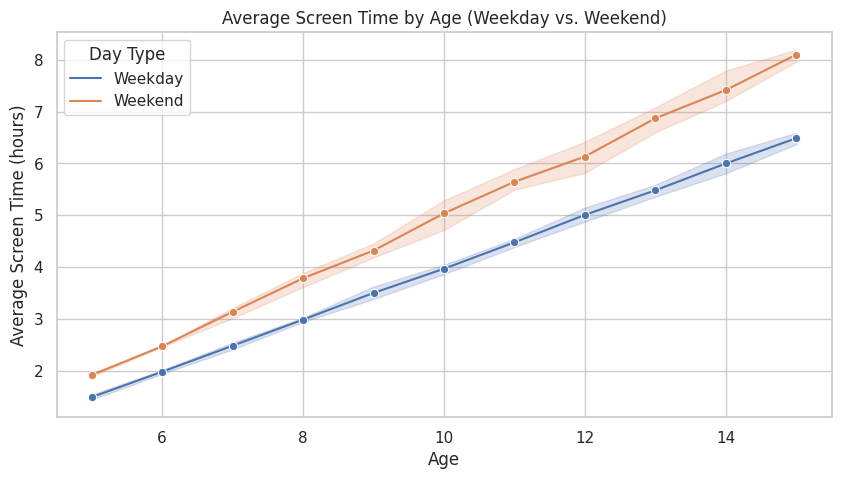

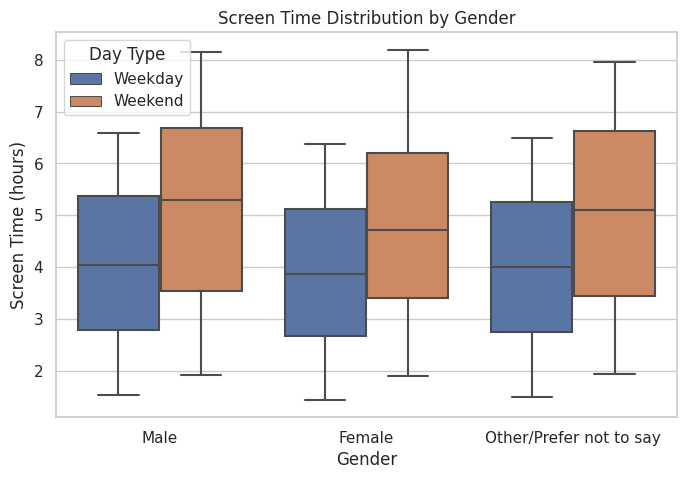

In [4]:
# ---------------------------------------------
# 2. Data Visualization
# ---------------------------------------------

# 📈 Average screen time by age
plt.figure(figsize=(10, 5))
sns.lineplot(data=df[df["Screen Time Type"] == "Total"], x="Age", y="Average Screen Time (hours)", hue="Day Type", marker="o")
plt.title("Average Screen Time by Age (Weekday vs. Weekend)")
plt.xlabel("Age")
plt.ylabel("Average Screen Time (hours)")
plt.legend(title="Day Type")
plt.show()

# 🎭 Distribution of screen time by gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df["Screen Time Type"] == "Total"], x="Gender", y="Average Screen Time (hours)", hue="Day Type")
plt.title("Screen Time Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Screen Time (hours)")
plt.legend(title="Day Type")
plt.show()

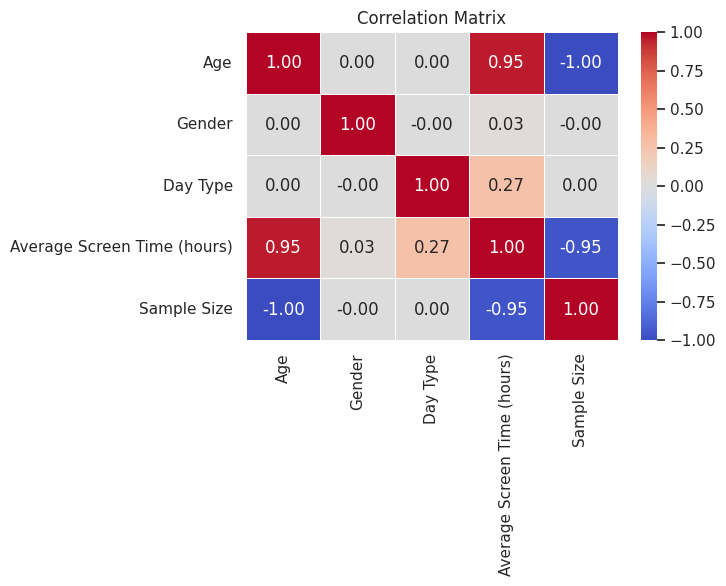

In [6]:
# 🔄 Correlation Matrix
df_corr = df[df["Screen Time Type"] == "Total"].drop(columns=["Screen Time Type"])
df_corr["Gender"] = df_corr["Gender"].astype("category").cat.codes
df_corr["Day Type"] = df_corr["Day Type"].map({"Weekday": 0, "Weekend": 1})

plt.figure(figsize=(6, 4))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [7]:
# ---------------------------------------------
# 3. Predictive Modeling
# ---------------------------------------------

# Convert categorical data
df_ml = df[df["Screen Time Type"] == "Total"].copy()
df_ml["Gender"] = df_ml["Gender"].astype("category").cat.codes
df_ml["Day Type"] = df_ml["Day Type"].map({"Weekday": 0, "Weekend": 1})

# Selecting features and target variable
X = df_ml[["Age", "Gender", "Day Type"]]
y = df_ml["Average Screen Time (hours)"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n📊 Linear Regression Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.3f}")

# 🔹 Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n🌲 Random Forest Performance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.3f}")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.3f}")

# ---------------------------------------------
# 4. Conclusion
# ---------------------------------------------

print("\n✅ Analysis Completed. Key Findings:")
print("- Screen time increases with age.")
print("- Recreational screen time dominates.")
print("- Weekends show significantly higher screen time.")
print("- Random Forest model performed better than Linear Regression.")

# End of script


📊 Linear Regression Performance:
MAE: 0.212
MSE: 0.061
R² Score: 0.987

🌲 Random Forest Performance:
MAE: 0.160
MSE: 0.041
R² Score: 0.991

✅ Analysis Completed. Key Findings:
- Screen time increases with age.
- Recreational screen time dominates.
- Weekends show significantly higher screen time.
- Random Forest model performed better than Linear Regression.
